In [13]:
import pydicom as dicom
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

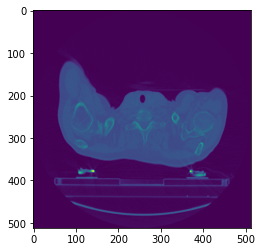

In [14]:
image_path = 'D:/projects/Lotus/1.3.6.1.4.1.40744.29.239341353911714368772597187099978969331-0-18-sktbnn.dcm'
ds = dicom.dcmread(image_path)
image = ds.pixel_array
plt.imshow(image)



In [15]:
print(ds)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 200
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.40744.29.82722552975093868414857045730069120095
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1
(0002, 0013) Implementation Version Name         SH: 'dcm4che-2.0'
(0002, 0016) Source Application Entity Title     AE: 'CTP'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL', 'CT_SOM5 SPI']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.40744.29.8272255297

In [16]:
print(image.shape)
print(image.min())
print(image.max())

(512, 512)
0
4058


## Transformation to HU

The Hounsfield Unit (HU) is a relative quantitative measurement of the intensity of radio waves used by radiologists for better explanation and understanding of computed tomography (CT) images. The absorption/attenuation coefficient of radiation within a tissue is used during CT reconstruction to produce a grayscale image. The linear transformation produces a Hounsfield scale that displays as gray tones. More dense tissue, with greater X-ray beam absorption, has positive values and appears bright; less dense tissue, with less X-ray beam absorption, has negative values and appears dark.The Hounsfield unit is named after the famous Sir Godfrey Hounsfield, who has part of the invention of Computer Tomography and was awarded the Nobel Prize for it.

In [17]:
def transform_to_hu(ds, image):
    intercept = ds.RescaleIntercept
    slope = ds.RescaleSlope
    hu_image = image * slope + intercept

    return hu_image

def window_image(image, window_center, window_width):
    img_min = window_center - window_width // 2
    img_max = window_center + window_width // 2
    window_image = image.copy()
    window_image[window_image < img_min] = img_min
    window_image[window_image > img_max] = img_max
    
    return window_image

In [18]:
transformed_img = transform_to_hu(ds, image)
#plt.imshow(transformed_img)

In [19]:
'''

def remove_noise(image_path, display=False):
    medical_image = pydicom.read_file(image_path)
    image = medical_image.pixel_array
    
    hu_image = transform_to_hu(medical_image, image)
    lung_image = window_image(hu_image, 40, 80) #bone windowing
    
    segmentation = morphology.dilation(lung_image, np.ones((1, 1)))
    labels, label_nb = ndimage.label(segmentation)
    
    label_count = np.bincount(labels.ravel().astype(np.int))
    label_count[0] = 0

    mask = labels == label_count.argmax()
 
    mask = morphology.dilation(mask, np.ones((1, 1)))
    mask = ndimage.morphology.binary_fill_holes(mask)
    mask = morphology.dilation(mask, np.ones((3, 3)))
    masked_image = mask * lung_image
    return masked_image
    
'''

'\n\ndef remove_noise(image_path, display=False):\n    medical_image = pydicom.read_file(image_path)\n    image = medical_image.pixel_array\n    \n    hu_image = transform_to_hu(medical_image, image)\n    lung_image = window_image(hu_image, 40, 80) #bone windowing\n    \n    segmentation = morphology.dilation(lung_image, np.ones((1, 1)))\n    labels, label_nb = ndimage.label(segmentation)\n    \n    label_count = np.bincount(labels.ravel().astype(np.int))\n    label_count[0] = 0\n\n    mask = labels == label_count.argmax()\n \n    mask = morphology.dilation(mask, np.ones((1, 1)))\n    mask = ndimage.morphology.binary_fill_holes(mask)\n    mask = morphology.dilation(mask, np.ones((3, 3)))\n    masked_image = mask * lung_image\n    return masked_image\n    \n'

C:\Users\Khushali\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


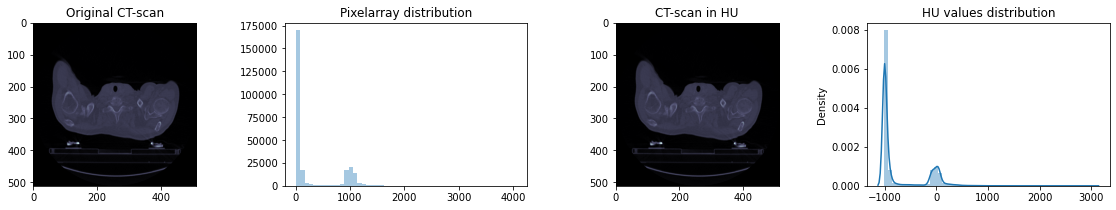

In [20]:
fig, ax = plt.subplots(1,4,figsize=(20,3))
ax[0].set_title("Original CT-scan")
ax[0].imshow(ds.pixel_array, cmap="bone")
ax[1].set_title("Pixelarray distribution");
sns.distplot(ds.pixel_array.flatten(), kde=False, ax=ax[1]);

ax[2].set_title("CT-scan in HU")
ax[2].imshow(transformed_img, cmap="bone")
ax[3].set_title("HU values distribution");
sns.distplot(transformed_img.flatten(), ax=ax[3]);

C:\Users\Khushali\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'count')

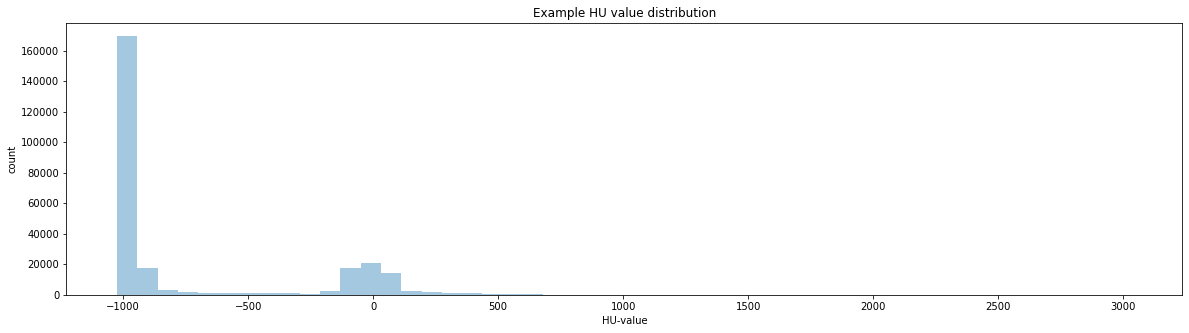

In [21]:
plt.figure(figsize=(20,5))
sns.distplot(transformed_img, kde=False)
plt.title("Example HU value distribution");
plt.xlabel("HU-value")
plt.ylabel("count")

In [22]:
binary_image = np.array(transformed_img>-320, dtype=np.int8) + 1
np.unique(binary_image)

array([1, 2], dtype=int8)

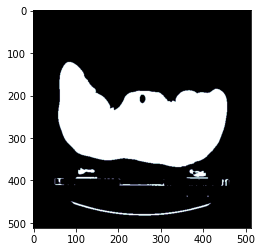

In [23]:
plt.imshow(binary_image, cmap="bone")